In [2]:
# Train network
# To adjust whether there are biases, change use_bias=True/False

import numpy as np
import tensorflow as tf
from functools import partial
import os

# Widths of layers
n_inputs = 1
n_hidden1 = 2
n_outputs = 1

num_train = 10000
num_val = 100
learning_rate = 0.001
n_epochs = 1000  # Number of steps of optimization procedure
batch_size = 100  # Number of training examples in each batch of mini-batch optimization
reg_lam = 10**(-8)  # Constant weight of regularization loss

folder_name = 'Identity_exp1'  # Folder to be created for saved output
exp_name = 'exp1'
model_path = ('./%s/%s_model.ckpt' % (folder_name, exp_name))  # Name of checkpoint file to save

# Set up the graph (Construction phase)
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None, n_outputs), name="y")

he_init = tf.contrib.layers.variance_scaling_initializer()
my_dense_layer = partial(tf.layers.dense, activation=tf.nn.relu, use_bias=True, kernel_initializer=he_init,
                         kernel_regularizer=tf.contrib.layers.l2_regularizer(reg_lam), bias_regularizer=None)

with tf.name_scope("network"):
    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    output = tf.layers.dense(hidden1, n_outputs, name="outputs", activation=None, use_bias=True, 
                             kernel_initializer=he_init, kernel_regularizer=tf.contrib.layers.l2_regularizer(reg_lam))

with tf.name_scope("loss"):
    mse = tf.reduce_mean(tf.squared_difference(output,y))
    reg_loss = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = mse + reg_loss

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

sess = tf.Session()
init = tf.global_variables_initializer()
saver = tf.train.Saver()


# Create numpy arrays with data
X_train = 2*(np.random.rand(num_train,n_inputs)-.5)
y_train = X_train

X_valid = 4*(np.random.rand(num_val,n_inputs)-.5)
y_valid = X_valid

# Define function to randomly split training data into batches
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

# Execution phase
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            mse_train = mse.eval(feed_dict={X: X_train, y: y_train})
            rmse_train = np.sqrt(mse_train)
            mse_val = mse.eval(feed_dict={X: X_valid, y: y_valid})
            rmse_val = np.sqrt(mse_val)
            print(epoch, "Training error:", rmse_train, "Val error:", rmse_val)
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    
    print("Final Training error:", rmse_train, "Final Val error:", rmse_val)

    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
        
    hidden1_weights = sess.run(tf.get_default_graph().get_tensor_by_name("hidden1/kernel:0"))    
    hidden1_bias = sess.run(tf.get_default_graph().get_tensor_by_name("hidden1/bias:0"))   
    print("Layer 1 weights:",hidden1_weights) 
    print("Layer 1 bias:", hidden1_bias)
    output_weights = sess.run(tf.get_default_graph().get_tensor_by_name("outputs/kernel:0"))   
    output_bias = sess.run(tf.get_default_graph().get_tensor_by_name("outputs/bias:0"))   
    print("Layer 2 weights:",output_weights) 
    print("Layer 2 bias:", output_bias)
    
    #graph = tf.get_default_graph()
    #for op in graph.get_operations():
    #   print(op.name)
    
    x_pts = np.linspace(-10,10,101).reshape((101,1))
    plot_outputs = output.eval(feed_dict={X: x_pts, y:x_pts})
    x_pts = x_pts[:,0]
    plot_outputs = plot_outputs[:,0]
        
    save_path = saver.save(sess, model_path)

(0, 'Training error:', 0.4764338, 'Val error:', 0.9389365)
(100, 'Training error:', 3.5032325e-08, 'Val error:', 9.493426e-08)
(200, 'Training error:', 5.230545e-07, 'Val error:', 8.721063e-07)
(300, 'Training error:', 7.753999e-07, 'Val error:', 9.648821e-07)
(400, 'Training error:', 1.6098725e-06, 'Val error:', 2.3199395e-06)
(500, 'Training error:', 6.8723784e-05, 'Val error:', 6.940498e-05)
(600, 'Training error:', 1.9983872e-05, 'Val error:', 2.834156e-05)
(700, 'Training error:', 5.0754565e-08, 'Val error:', 1.4144298e-07)
(800, 'Training error:', 1.110942e-06, 'Val error:', 1.4012985e-06)
(900, 'Training error:', 2.6877611e-05, 'Val error:', 4.693499e-05)
('Final Training error:', 2.6877611e-05, 'Final Val error:', 4.693499e-05)
('Layer 1 weights:', array([[ 0.38018346, -1.8222693 ]], dtype=float32))
('Layer 1 bias:', array([ 0.01080637, -0.05179317], dtype=float32))
('Layer 2 weights:', array([[ 2.6303325],
       [-0.5487628]], dtype=float32))
('Layer 2 bias:', array([-0.02842

In [7]:
# Import libraries to plot results
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

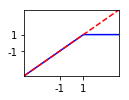

In [44]:
# Network 1 - Good on training data (-1,1) and all negative numbers, but bad for x > 1
W1 = np.array([[-1.1643755e-27, -6.8680680e-01]])
b1 = np.array([-0.55037504,  0.6867434 ])
W2 = np.array([[ 1.1643292e-27],[-1.4560152e+00]])
b2 = np.array([0.9998924])

x_pts = np.linspace(-4,4,101).reshape((101,1))
hidden1 = np.matmul(x_pts,W1)+b1
hidden1 = np.maximum(hidden1,0)
plot_outputs = np.matmul(hidden1,W2)+b2

plt.figure(figsize=(1.9,1.5))
plt.plot(x_pts, plot_outputs, "b-", linewidth=1.5)
plt.plot(x_pts, x_pts, "r--", linewidth=1.5)
plt.xticks(np.arange(-1,2,2), ['-1','1'])
plt.yticks(np.arange(-1,2,2), ['-1','1'])
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.tight_layout()
filename = '../PDEKoopmanAutoencoder/figures/Identity1.eps' 
plt.savefig(filename,format='eps')


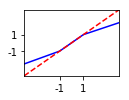

In [38]:
# Network 2 - Good for training data (-1,1), but bad outside that range
W1 = np.array([[ 0.7733566 , -0.61134154]])
b1 = np.array([0.7727593 , 0.61113834])
W2 = np.array([[ 0.62076116],[-0.8504674 ]])
b2 = np.array([0.04005011])

x_pts = np.linspace(-4,4,101).reshape((101,1))
hidden1 = np.matmul(x_pts,W1)+b1
hidden1 = np.maximum(hidden1,0)
plot_outputs = np.matmul(hidden1,W2)+b2

plt.figure(figsize=(1.9,1.5))
plt.plot(x_pts, plot_outputs, "b-", linewidth=1.5)
plt.plot(x_pts, x_pts, "r--", linewidth=1.5)
plt.xticks(np.arange(-1,2,2), ['-1','1'])
plt.yticks(np.arange(-1,2,2), ['-1','1'])
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.tight_layout()
filename = '../PDEKoopmanAutoencoder/figures/Identity2.eps' 
plt.savefig(filename,format='eps')

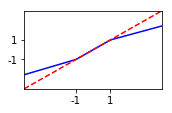

In [45]:
# Remake Network 2 but larger for Fig. 2 in the paper
W1 = np.array([[ 0.7733566 , -0.61134154]])
b1 = np.array([0.7727593 , 0.61113834])
W2 = np.array([[ 0.62076116],[-0.8504674 ]])
b2 = np.array([0.04005011])

x_pts = np.linspace(-4,4,101).reshape((101,1))
hidden1 = np.matmul(x_pts,W1)+b1
hidden1 = np.maximum(hidden1,0)
plot_outputs = np.matmul(hidden1,W2)+b2

plt.figure(figsize=(2.5,1.67))
#plt.figure()
plt.plot(x_pts, plot_outputs, "b-", linewidth=1.5)
plt.plot(x_pts, x_pts, "r--", linewidth=1.5)
plt.xticks(np.arange(-1,2,2), ['-1','1'])
plt.yticks(np.arange(-1,2,2), ['-1','1'])
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.tight_layout()
filename = '../PDEKoopmanAutoencoder/figures/Identity2b.eps' 
plt.savefig(filename,format='eps')



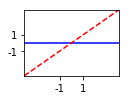

In [39]:
# Network 3 - Failed for all data (zero network)
W1 = np.array([[1.8188939e-27, 2.4089657e-27]])
b1 = np.array([-0.91761726, -0.82744503])
W2 = np.array([[-1.8809739e-27],[-2.3652775e-27]])
b2 = np.array([0.00521214])

x_pts = np.linspace(-4,4,101).reshape((101,1))
hidden1 = np.matmul(x_pts,W1)+b1
hidden1 = np.maximum(hidden1,0)
plot_outputs = np.matmul(hidden1,W2)+b2

plt.figure(figsize=(1.9,1.5))
plt.plot(x_pts, plot_outputs, "b-", linewidth=1.5)
plt.plot(x_pts, x_pts, "r--", linewidth=1.5)
plt.xticks(np.arange(-1,2,2), ['-1','1'])
plt.yticks(np.arange(-1,2,2), ['-1','1'])
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.tight_layout()
filename = '../PDEKoopmanAutoencoder/figures/Identity3.eps' 
plt.savefig(filename,format='eps')

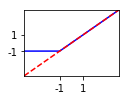

In [40]:
# Network 4 - Good on training data (-1,1) and all positive numbers, but bad for x < -1
W1 = np.array([[1.65907562e+00, 1.16404265e-27]])
b1 = np.array([ 1.6593537, -0.5873199])
W2 = np.array([[6.027454e-01],[1.263996e-25]])
b2 = np.array([-1.000168])

x_pts = np.linspace(-4,4,101).reshape((101,1))
hidden1 = np.matmul(x_pts,W1)+b1
hidden1 = np.maximum(hidden1,0)
plot_outputs = np.matmul(hidden1,W2)+b2

plt.figure(figsize=(1.9,1.5))
plt.plot(x_pts, plot_outputs, "b-", linewidth=1.5)
plt.plot(x_pts, x_pts, "r--", linewidth=1.5)
plt.xticks(np.arange(-1,2,2), ['-1','1'])
plt.yticks(np.arange(-1,2,2), ['-1','1'])
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.tight_layout()
filename = '../PDEKoopmanAutoencoder/figures/Identity4.eps' 
plt.savefig(filename,format='eps')

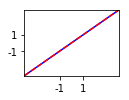

In [42]:
# Network 5 - Extrapolates to all values (really the identity), although it doesn't minimize norm of weights
W1 = np.array([[ 1.3979889, -1.3340074]])
b1 = np.array([-0.17238672,  0.16449594])
W2 = np.array([[ 0.7153113],[-0.7496229]])
b2 = np.array([0.12330835])

x_pts = np.linspace(-4,4,101).reshape((101,1))
hidden1 = np.matmul(x_pts,W1)+b1
hidden1 = np.maximum(hidden1,0)
plot_outputs = np.matmul(hidden1,W2)+b2

plt.figure(figsize=(1.9,1.5))
plt.plot(x_pts, plot_outputs, "b-", linewidth=1.5)
plt.plot(x_pts, x_pts, "r--", linewidth=1.5)
plt.xticks(np.arange(-1,2,2), ['-1','1'])
plt.yticks(np.arange(-1,2,2), ['-1','1'])
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.tight_layout()
filename = '../PDEKoopmanAutoencoder/figures/Identity5.eps' 
plt.savefig(filename,format='eps')

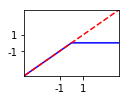

In [43]:
# Network 6 - Good on only the bottom half of training data - i.e. works for negatives but not positives
# This one was trained with no bias on the output
W1 = np.array([[-0.20629159, -0.9959961 ]])
b1 = np.array([-0.00013062, -0.00018518])
W2 = np.array([[ 1.9960595],[-1.4174443]])
b2 = np.array([0])

x_pts = np.linspace(-10,10,101).reshape((101,1))
hidden1 = np.matmul(x_pts,W1)+b1
hidden1 = np.maximum(hidden1,0)
plot_outputs = np.matmul(hidden1,W2)+b2

plt.figure(figsize=(1.9,1.5))
plt.plot(x_pts, plot_outputs, "b-", linewidth=1.5)
plt.plot(x_pts, x_pts, "r--", linewidth=1.5)
plt.xticks(np.arange(-1,2,2), ['-1','1'])
plt.yticks(np.arange(-1,2,2), ['-1','1'])
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.tight_layout()
filename = '../PDEKoopmanAutoencoder/figures/Identity6.eps' 
plt.savefig(filename,format='eps')